In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from tweepy import Stream
from tweepy.streaming import StreamListener
import sys
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import csv

In [2]:
consumer_key='W3JjGNNESZ2vp3jiiVD80c73A'
consumer_secret='iWFWQN4eGaJhugXvKonxPIGQHJVIKY5UOIrp55LDUw5LSigVUe'
access_token='700536412-p7ol7tUmvlQinvlXOMfRkBll3AM9PM9dd9Z1nbKo'
access_token_secret='VmUXPnO944k1Oijt9oiMhJsBbMCOWGwbgCRTNrn9L1dp0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweet_get=input("Enter the hashtag with your topic: ")
tweet_num=int(input("Enter the number of tweets you want to get(must be less or equal to 30):"))

if '#' not in tweet_get:
    tweet_get="#" + tweet_get

for tweet in tweepy.Cursor(api.search,q=tweet_get,
                         lang="en").items(tweet_num):
    with open('raw_tweet.txt','a')as file:
        file.write(tweet.text+'\n')
    print(tweet.created_at,tweet.text)


Enter the hashtag with your topic: CentralPark
Enter the number of tweets you want to get(must be less or equal to 30):30
2018-11-20 20:28:35 I’m not ready for winter. Are you?
#WinterIsComing #skyline #GapstowBridge #centralpark #NYCParks… https://t.co/etvQVpCqem
2018-11-20 20:25:07 You haven't seen a tree until you've seen its shadow from the sky

Use promo code Fall2018 for a special rate of $1… https://t.co/lHTdAR86Ne
2018-11-20 20:00:35 join us for a Carriage ride in Central Park today! rides run from 10am-11pm daily and a ticket is needed- visit our… https://t.co/JwNO0KtHWx
2018-11-20 19:52:41 Central Park 🍂 
.
.
.

#boy #guitarist #singer #photography #usa #centralpark #newyork #picoftheday #follow #itunes… https://t.co/sKWU0W3azq
2018-11-20 19:44:59 Enjoy these photos of Central Park in Autumn 🍂 #CentralPark #centralpark #newyork #nyc https://t.co/af35RMQdPL
2018-11-20 19:29:02 Trevor 1st graders spent their morning raking leaves as part of a service project with the Central Pa

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import nltk
import json
#from nltk import FreqDist

tweet_data=open('raw_tweet.txt').read()
tweet_data_clean=re.sub(r"https\S+","",tweet_data)
stop_words = nltk.corpus.stopwords.words('english')
newstopwords=['RT','I','We','A','An']
stop_words.extend(newstopwords)
#stop_words.append('I','We','RT')
tokenizer=RegexpTokenizer(r'\w+')
BagOfWords=tokenizer.tokenize(tweet_data_clean)
#BagOfWords=word_tokenize(tweet_data)
WordsFiltered=[]
#print(len(stopWords))
#print(stopWords)

for w in BagOfWords:
    if w not in stop_words:
        WordsFiltered.append(w)
#print(WordsFiltered)
fdist1=nltk.FreqDist(WordsFiltered)

with open('relevant-word-frequency.csv','w')as f:
        f.write(json.dumps(fdist1))


In [73]:
#type(WordsFiltered)
#print(WordsFiltered)
with open('Tableau-word.csv','w')as f:
    for s in WordsFiltered:
        f.write("%s\n" %s)

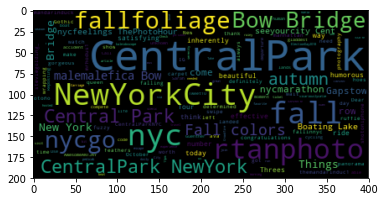

In [41]:
#Wordcloud
from wordcloud import WordCloud,STOPWORDS
StringOfWords=' '.join(WordsFiltered)
wordcloud=WordCloud().generate(StringOfWords)
import matplotlib.pyplot as plt
plt.imshow(wordcloud,interpolation='bilinear')
